In [10]:
import time
import nltk
from nltk.corpus import stopwords

from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
import string, re

from gensim.models import Word2Vec

from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
np.random.seed(0)

In [11]:
data_df = pd.read_csv('processing/data_df.csv')

In [12]:
data_df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Revenue,City,State,Salary Min,Salary Max,Revenue Index,Size Index,Ownership Index,Industry Index,Sector Index
0,Bilingual AI Transcriptionist (All Languages),$17.00 Per Hour,Calling all bilingual individuals - your skill...,2.7,Liberty Source,"Hampton, VA",51 to 200 Employees,2014.0,Company - Private,Information Technology Support Services,...,$5 to $25 million (USD),Hampton,VA,35360.0,35360.0,3.0,2.0,1.0,1.0,1.0
1,"Content Marketing, AI & Business Writer (Remote)",$25.00 - $35.00 Per Hour,We are currently looking for writers with prof...,NaN,Liberty Source,Remote,NaN,NaN,NaN,NaN,...,NaN,Remote,Remote,52000.0,72800.0,NaN,NaN,NaN,NaN,NaN
2,Content Writer with AI Experience,$14.00 - $24.00 Per Hour,About Experism.com:\nExperism.com is a growing...,NaN,Liberty Source,Remote,NaN,NaN,NaN,NaN,...,NaN,Remote,Remote,29120.0,49920.0,NaN,NaN,NaN,NaN,NaN
3,Large Language Model (LLM ) Prompt Writer,$39K - $68K,Be a part of the AI revolution as a Prompt Wri...,2.7,Liberty Source,"Hampton, VA",51 to 200 Employees,2014.0,Company - Private,Information Technology Support Services,...,$5 to $25 million (USD),Hampton,VA,39000.0,68000.0,3.0,2.0,1.0,1.0,1.0
4,Technology & AI Policy Research Associate,$50K,National Journal’s Presentation Center is hiri...,3.7,Liberty Source,"Washington, DC",51 to 200 Employees,1969.0,Company - Private,Publishing,...,$5 to $25 million (USD),Washington,DC,50000.0,50000.0,3.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7046,Data Engineering II,"$108,000 - $118,000 a year",Data Engineering II\rSalary: $108K-$118K\rClea...,5.0,Pueo Business Solutions,"Washington, DC",NaN,NaN,NaN,NaN,...,NaN,Washington,DC,108000.0,118000.0,NaN,NaN,NaN,NaN,NaN
7047,IR Day Shift,"$89,000 - $99,000 a year",Tier 2 IR Day Shift\rSalary Range: $89K-$99K\r...,5.0,Pueo Business Solutions,"Washington, DC",NaN,NaN,NaN,NaN,...,NaN,Washington,DC,89000.0,99000.0,NaN,NaN,NaN,NaN,NaN
7048,Security Engineer,"$89,000 - $99,000 a year",Security Engineer\rSalary Range: $89K-$99K\rCl...,5.0,Pueo Business Solutions,"Washington, DC",NaN,NaN,NaN,NaN,...,NaN,Washington,DC,89000.0,99000.0,NaN,NaN,NaN,NaN,NaN
7049,FDP Analyst,"$80,000 - $90,000 a year","Position Title: FDP Analyst\rCustomer: HQDA, G...",NaN,GC Associates USA,"Washington, DC",NaN,NaN,NaN,NaN,...,NaN,Washington,DC,80000.0,90000.0,NaN,NaN,NaN,NaN,NaN


In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7051 entries, 0 to 7050
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          7051 non-null   object 
 1   Salary Estimate    7051 non-null   object 
 2   Job Description    7051 non-null   object 
 3   Rating             6241 non-null   float64
 4   Company Name       7051 non-null   object 
 5   Location           7025 non-null   object 
 6   Size               5532 non-null   object 
 7   Founded            4653 non-null   float64
 8   Type of ownership  5974 non-null   object 
 9   Industry           5474 non-null   object 
 10  Sector             5474 non-null   object 
 11  Revenue            3847 non-null   object 
 12  City               7025 non-null   object 
 13  State              6566 non-null   object 
 14  Salary Min         7051 non-null   float64
 15  Salary Max         7051 non-null   float64
 16  Revenue Index      3847 

In [14]:
data_df.describe()

,Rating,Founded,Salary Min,Salary Max,Revenue Index,Size Index,Ownership Index,Industry Index,Sector Index
count,6241.000000,4653.000000,7051.000000,7051.000000,3847.000000,5532.000000,5925.000000,5474.000000,5474.000000
mean,3.879490,1964.684720,92356.456276,132085.015260,6.323109,4.684563,2.225485,19.634088,6.203873
std,0.549375,59.622131,43239.645550,65806.905476,2.479944,2.252083,1.718880,19.467918,5.892646
min,1.000000,1625.000000,3000.000000,3000.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.600000,1945.000000,63000.000000,90000.000000,4.000000,2.000000,1.000000,5.000000,1.000000
50%,3.900000,1986.000000,85000.000000,121000.000000,7.000000,5.000000,2.000000,14.000000,4.000000
75%,4.200000,2005.000000,113000.000000,160000.000000,9.000000,7.000000,2.000000,26.000000,11.000000
max,5.000000,2023.000000,452000.000000,650000.000000,9.000000,7.000000,11.000000,104.000000,25.000000


In [15]:
# add age of company
data_df['Age of company'] = time.localtime().tm_year - data_df['Founded']

In [16]:
# add average salary
data_df['Average Salary'] = (data_df['Salary Min'] + data_df['Salary Max']) / 2

In [17]:
data_df['Average Salary'].describe()

count      7051.000000
mean     112220.735768
std       53107.295109
min        3000.000000
25%       77000.000000
50%      103000.000000
75%      137500.000000
max      500000.000000
Name: Average Salary, dtype: float64

In [18]:
# plot numberical features
def plot_num_features(data_df, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(15,6))
        sns.histplot(data_df[feature], kde=True, bins=20)
        plt.title(feature)
        plt.show()

<font size = 15 color = Green>Plot count or distribution of fea</font>

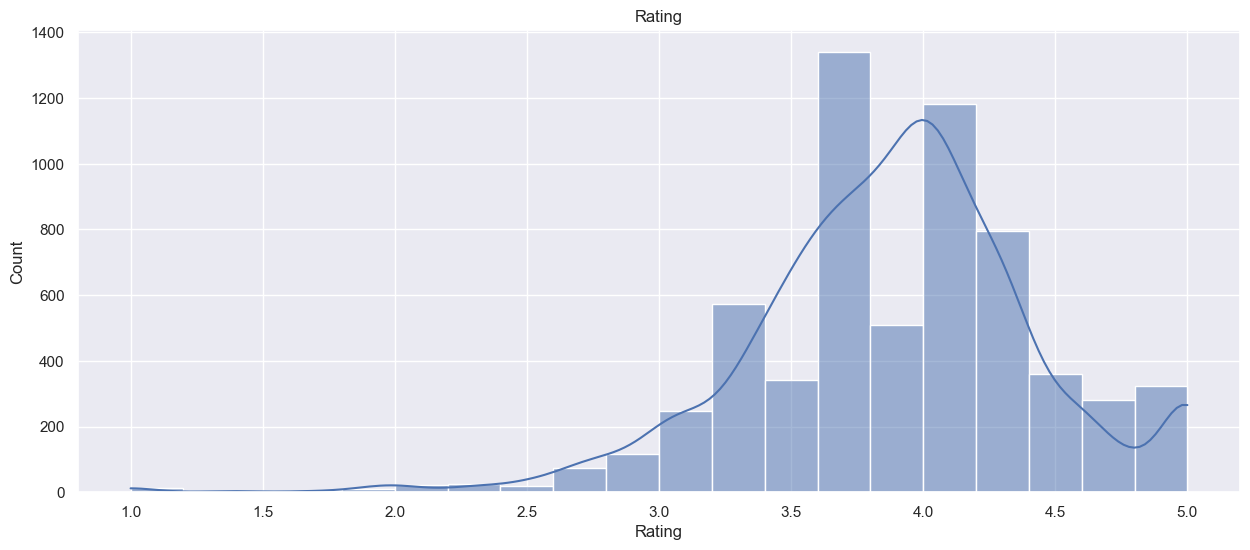

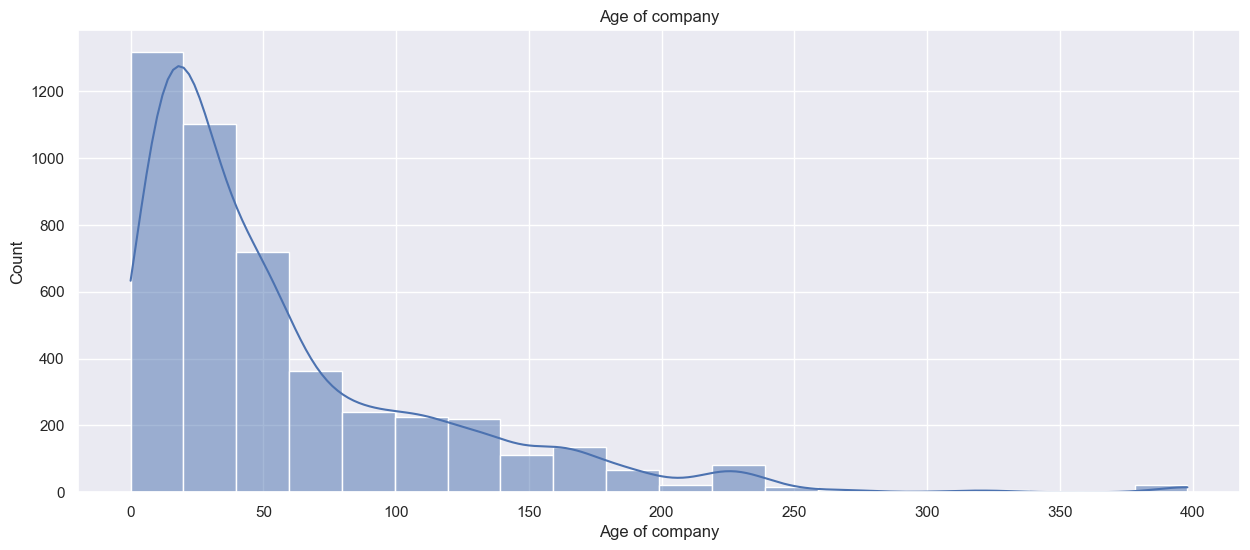

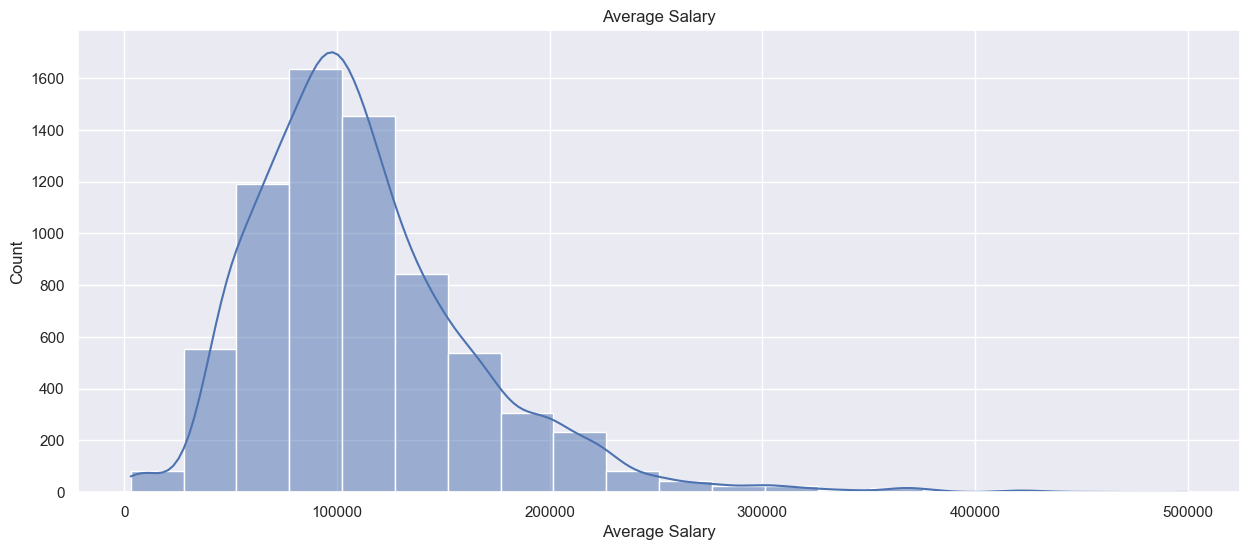

In [19]:
# plot 
plot_num_features(data_df, ['Rating', 'Age of company', 'Average Salary'])


In [20]:
# plot count of categorical features
def plot_cat_features(data_df, feature_list):
    for feature in feature_list:
        plt.figure(figsize=(15,6))
        lable_count = data_df[feature].value_counts()
        # make xlabel smaller to avoid overlap
        sns.barplot(x=lable_count.index, y=lable_count.values)
        plt.xticks(rotation=90)
        
        plt.title(feature)
        plt.show()
        

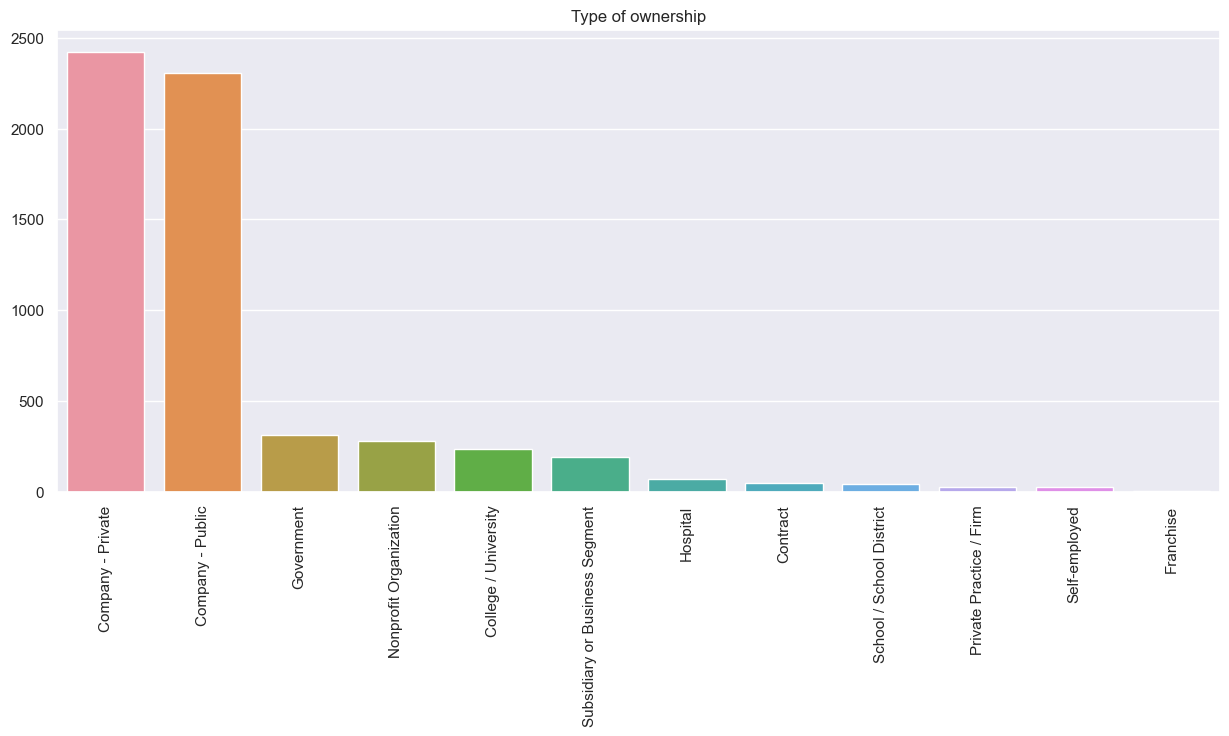

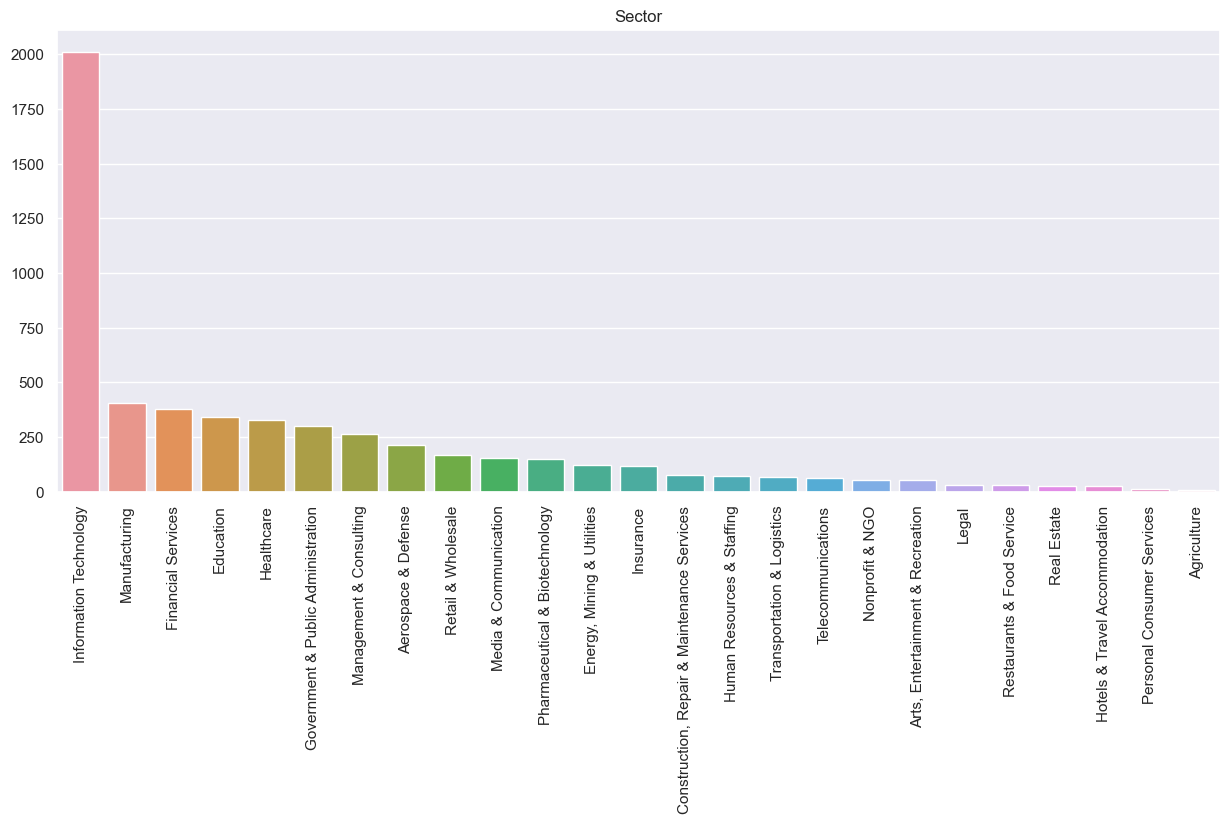

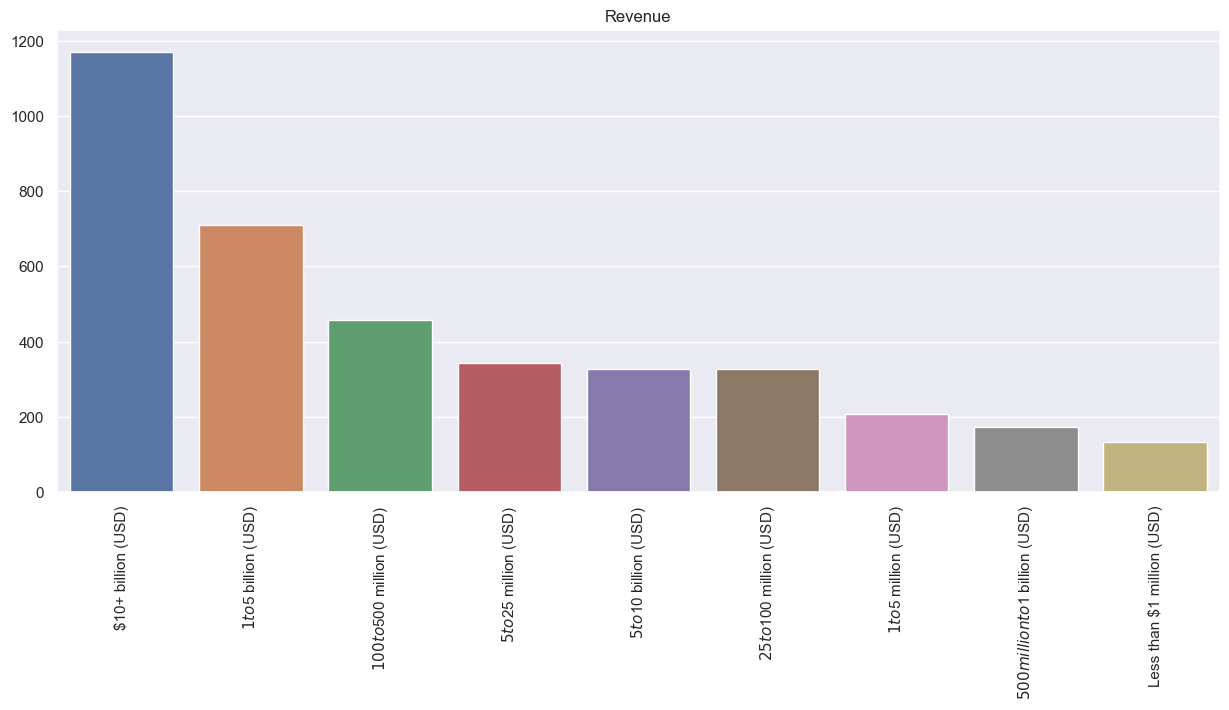

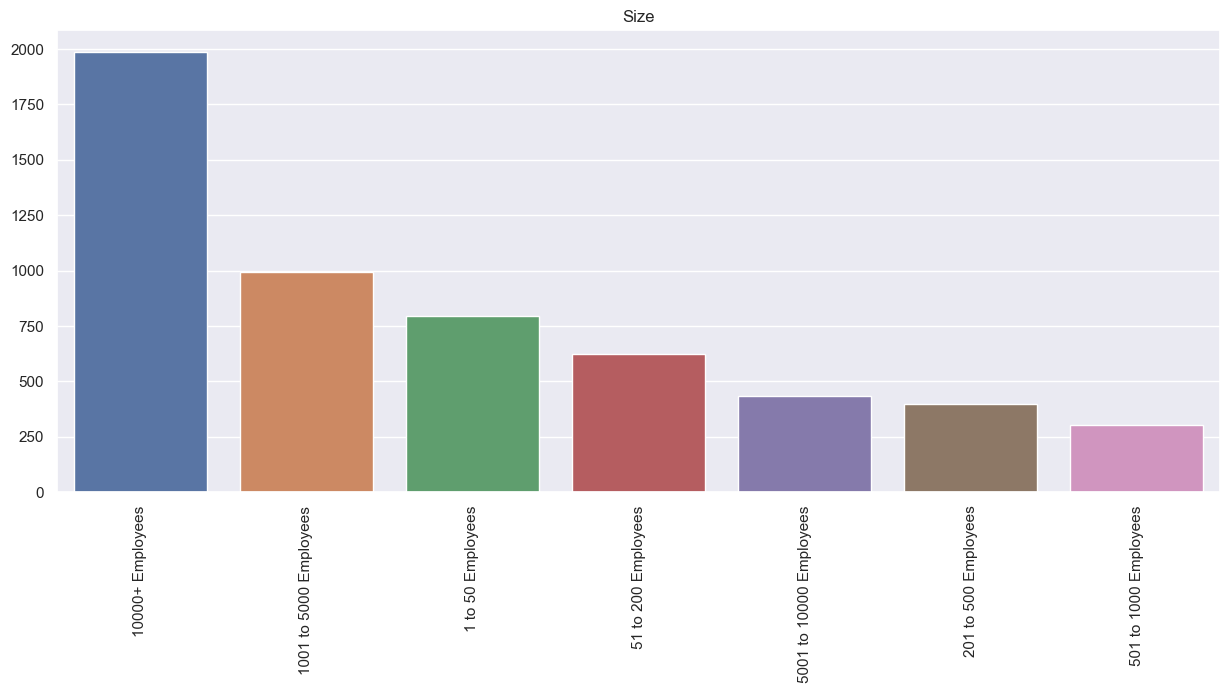

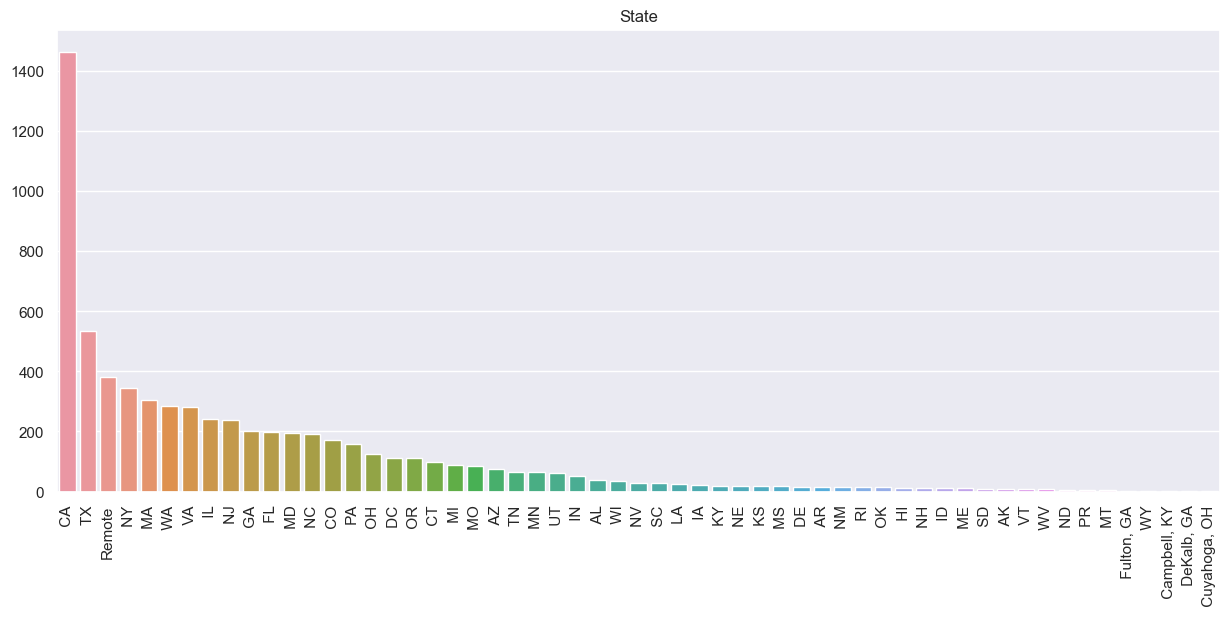

In [21]:
# plot
plot_cat_features(data_df, ['Type of ownership', 'Sector', 'Revenue', 'Size', 'State'])

<font size = 15 color = Green>Calculate correlation between numerical features</font>

In [22]:
# calculate correlation between numerical features
corr = data_df[['Rating', 'Age of company', 'Average Salary', 'Revenue Index','Size Index']].corr()

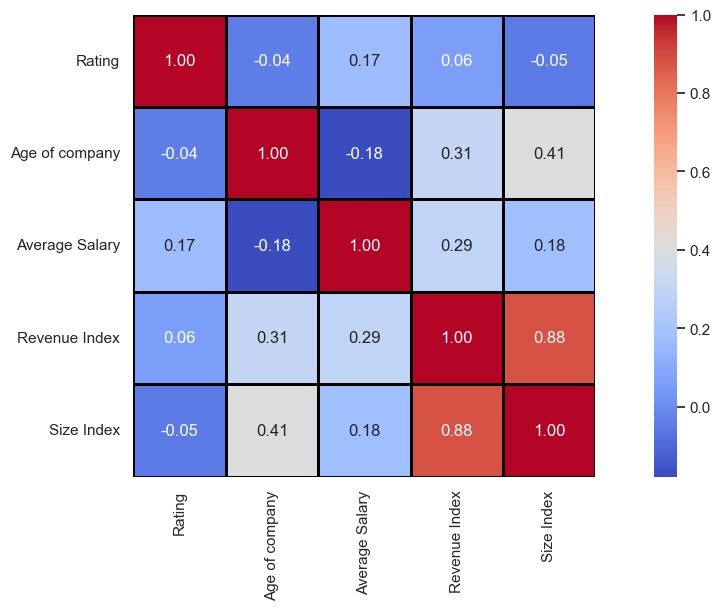

In [23]:
# plot correlation
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black', square=True)
plt.show()


<font size = 15 color = Green>Caculate average salary and plot between categorical features</font>

In [24]:
# caculate average salary and plot between categorical features
def plot_cat_num(data_df, feature_list):
    for feature in feature_list:
        avg_salary = data_df.groupby(feature)['Average Salary'].mean().sort_values(ascending=False)
        plt.figure(figsize=(15,6))
        len_feature = data_df[feature].unique().__len__()
        if len_feature > 30:
            sns.barplot(x=avg_salary.index[:30], y=avg_salary.values[:30])
        else:
            sns.barplot(x=avg_salary.index, y=avg_salary.values)
        plt.xticks(rotation=90)
        plt.title('Average Salary vs {}'.format(feature))
        plt.show()

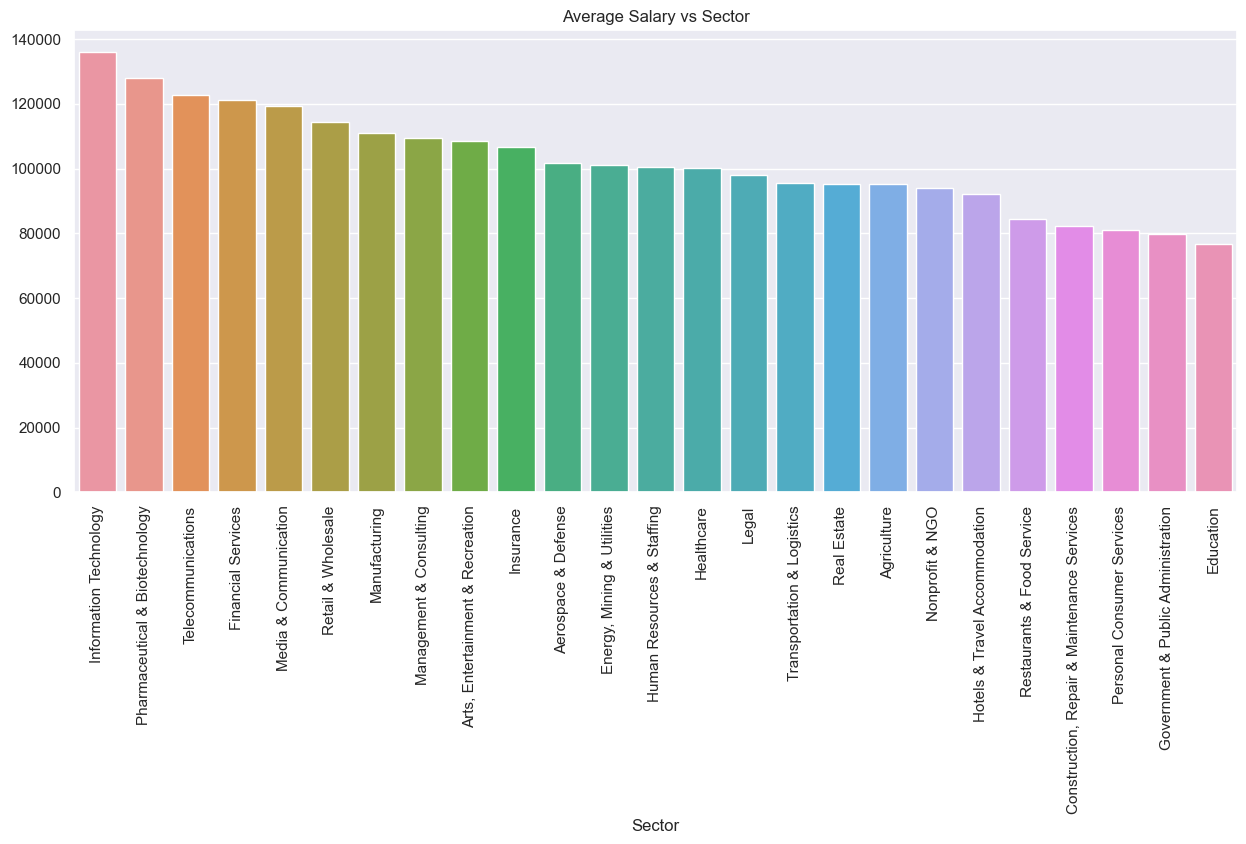

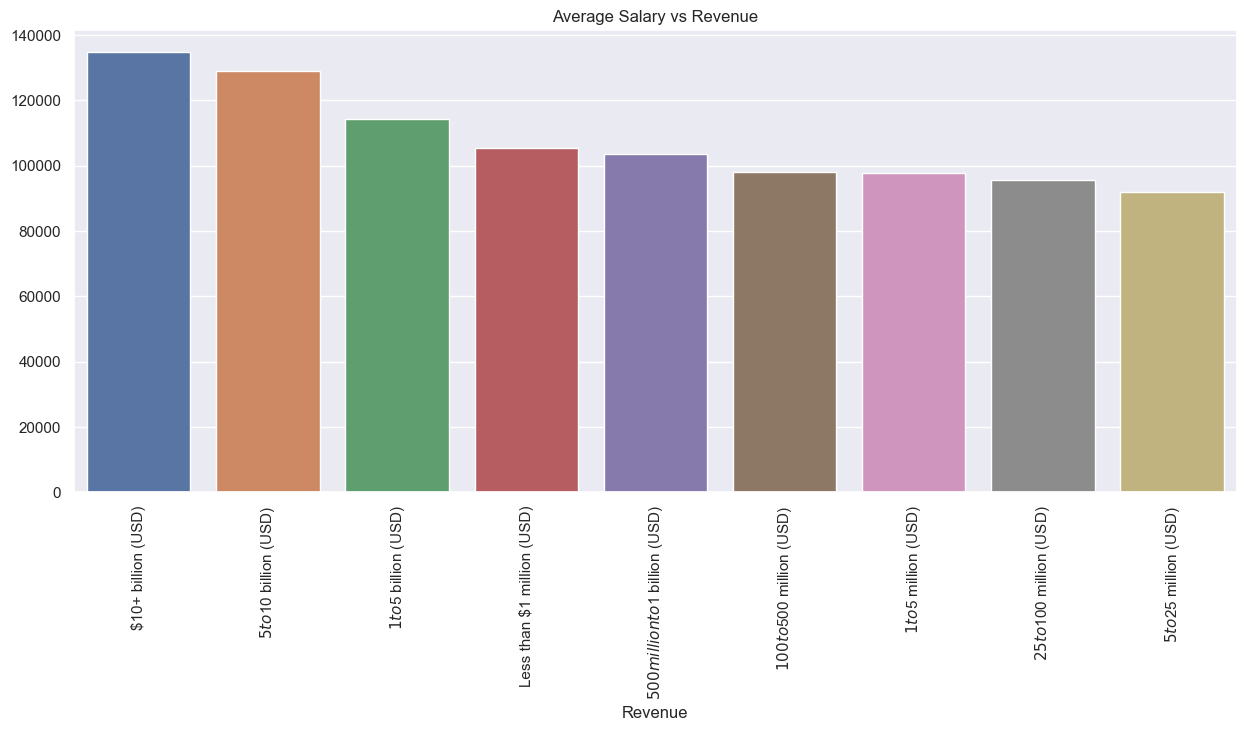

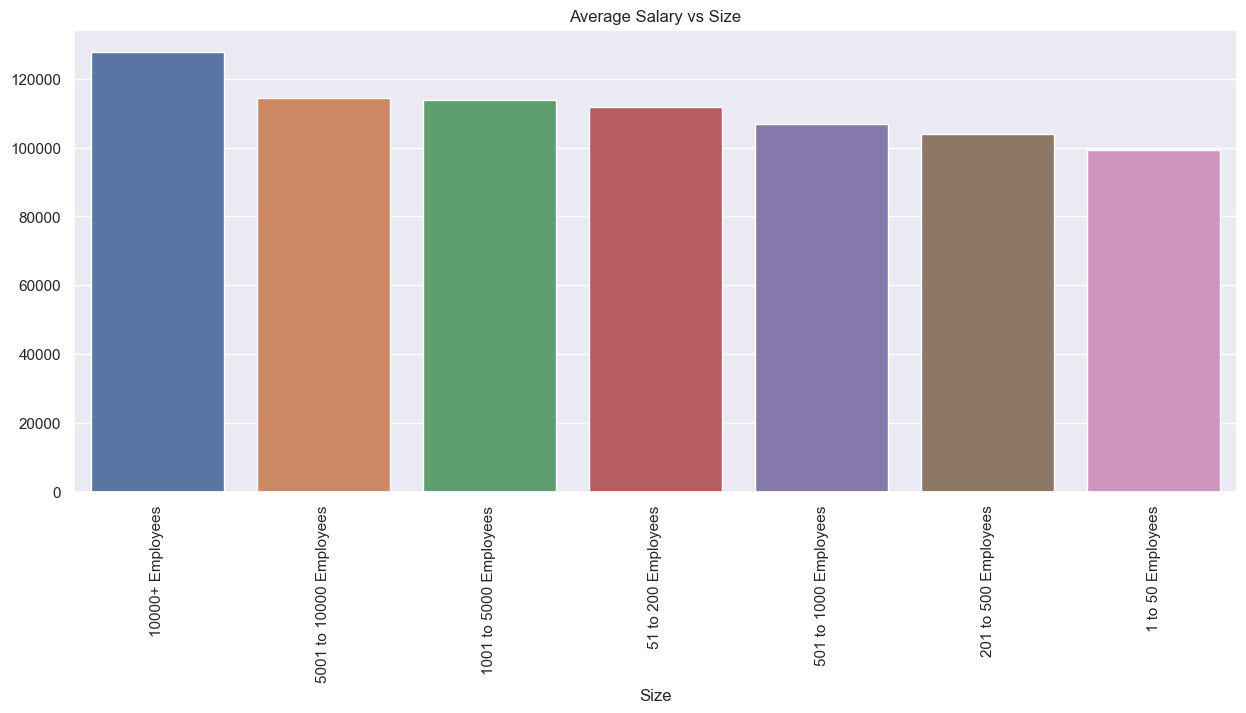

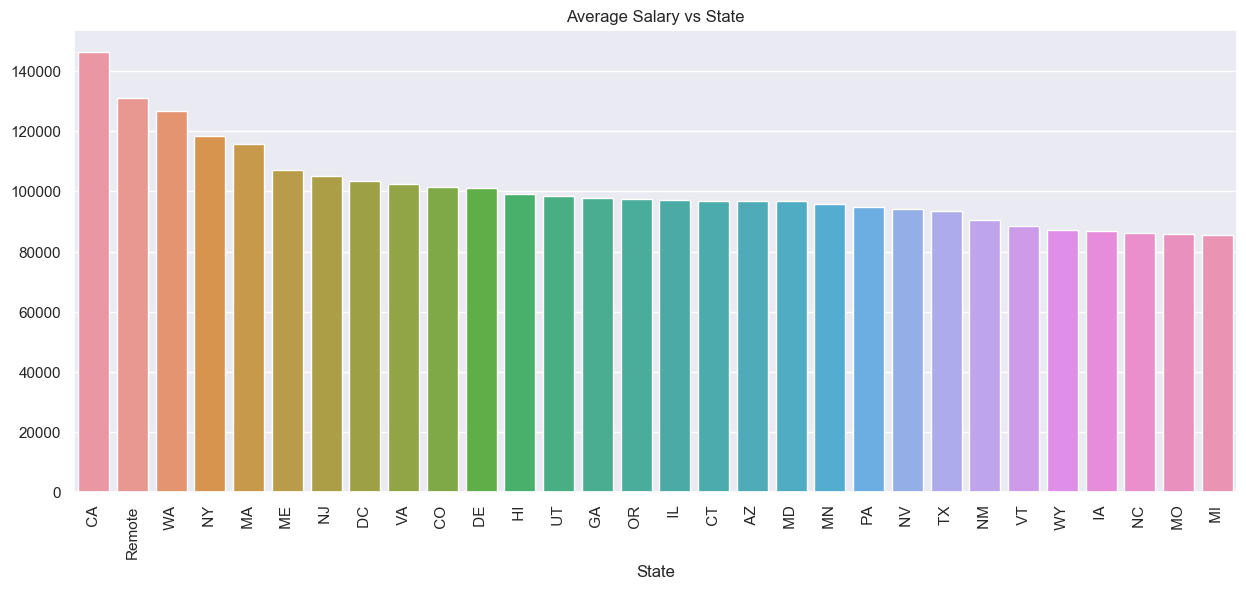

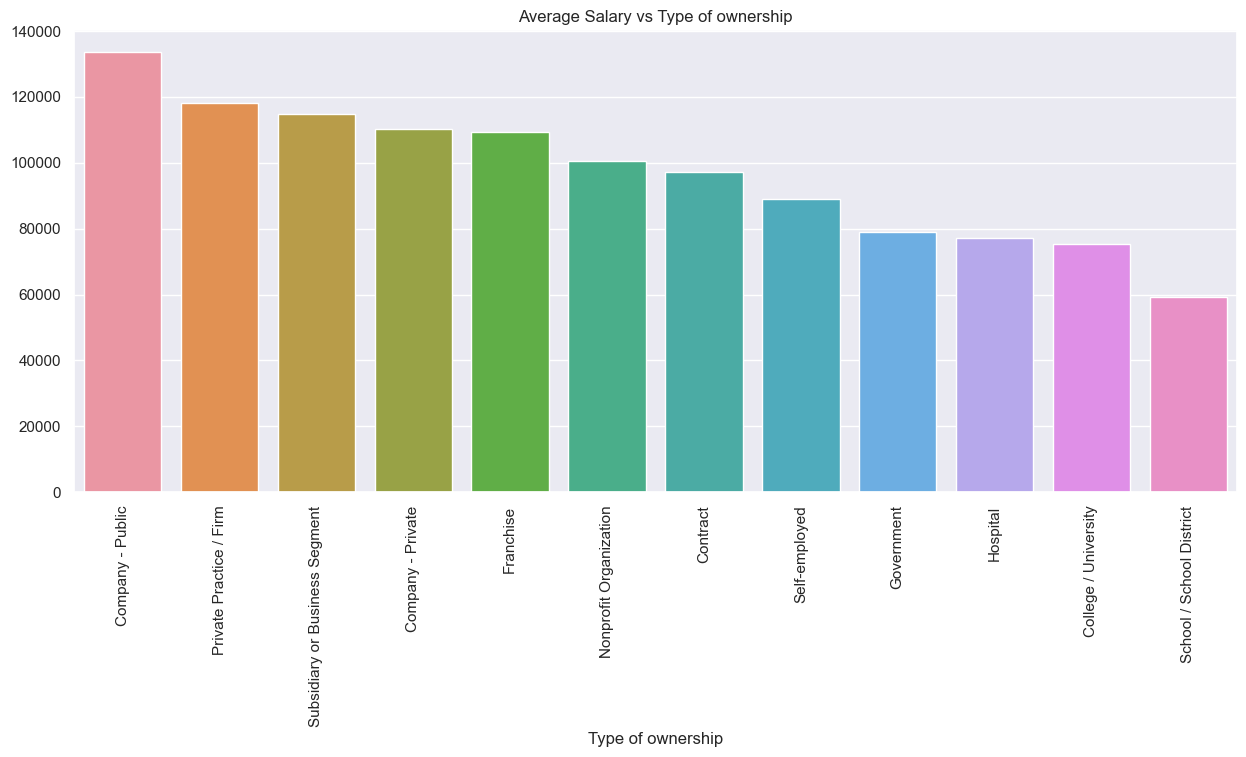

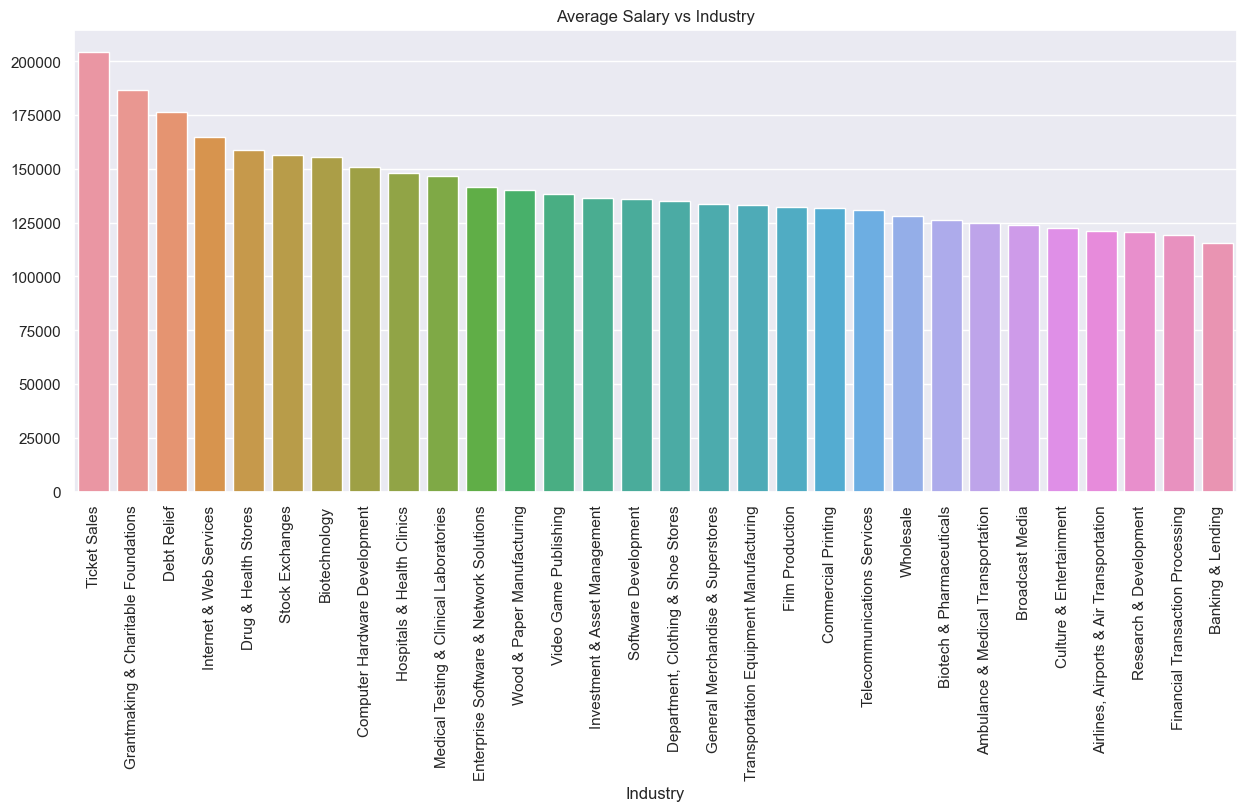

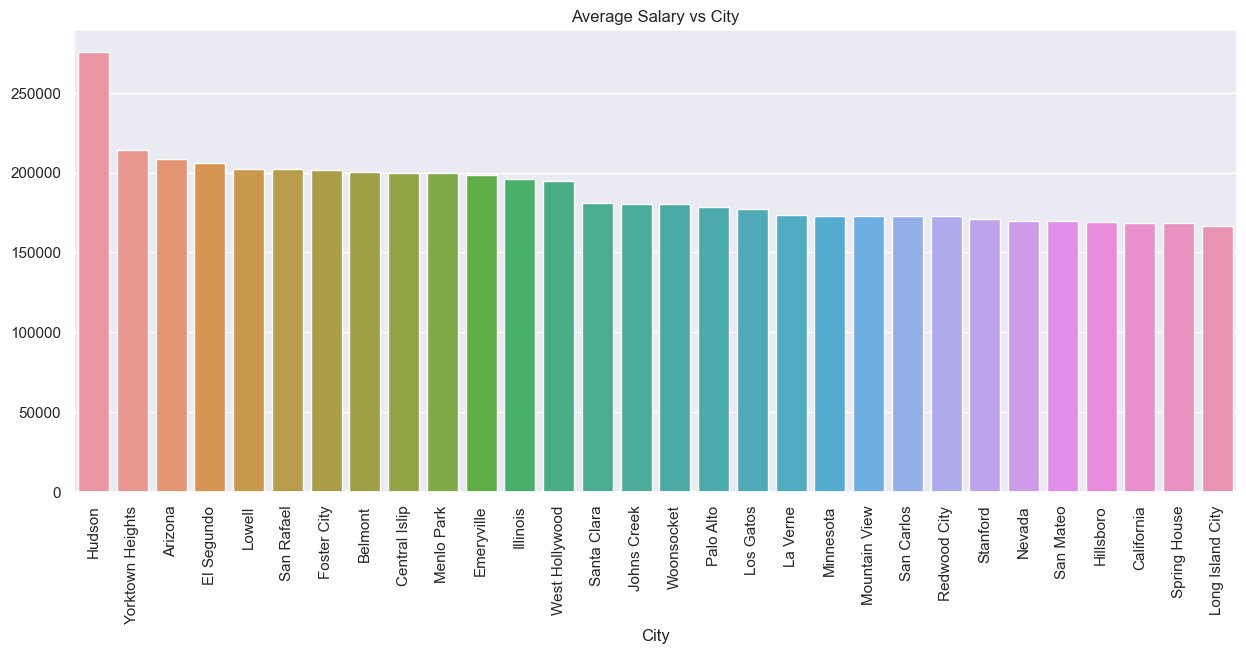

In [25]:
# plot
plot_cat_num(data_df, ['Sector', 'Revenue', 'Size', 'State', 'Type of ownership', 'Industry', 'City'])

<font size = 15 color = Green>Explore Titles</font>

In [26]:
# create salary bins
BINS = [0,50000,70000,90000,120000,150000,200000,500000]
LABELS = ['0-50k','50-70k','70-90k','90-120k','120-150k','150-200k','200k+']
data_df['Salary Range'] = pd.cut(data_df['Average Salary'], bins=BINS, labels=LABELS)

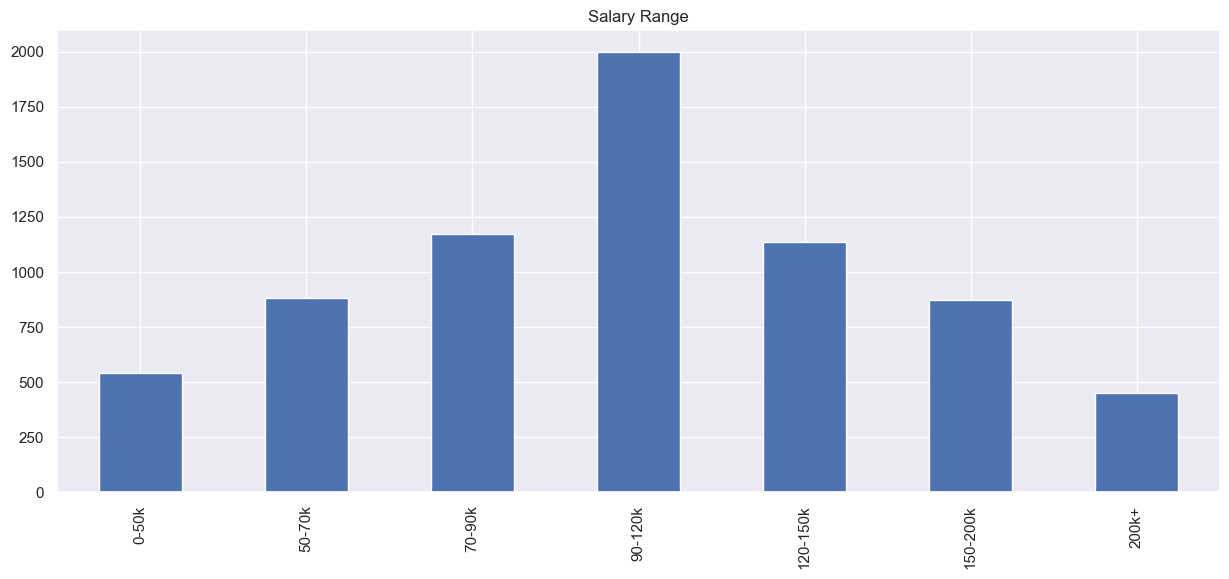

In [27]:
# plot salary range follow order LABELS
plt.figure(figsize=(15,6))
data_df['Salary Range'].value_counts().sort_index().plot(kind='bar')
plt.title('Salary Range')
plt.show()

In [28]:
data_df['Job Title'].value_counts()

DevOps Engineer                       143
Software Engineer                     127
Data Scientist                        116
Machine Learning Engineer              62
Data Analyst                           61
                                     ... 
Quality Assurance Analyst II            1
Associate IT Data Analyst               1
Engineer I-Software Infrastructure      1
6-8 Computer Science                    1
Junior MS Access/ VBA Developer         1
Name: Job Title, Length: 4303, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

y = data_df['Salary Range'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(data_df['Job Title'], y, test_size=0.2)
#use count vectorizer to examine title

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', ngram_range=(1,3), min_df=0.03)
#fitting count vectorizer to job title

cv.fit(X_train)

CountVectorizer(min_df=0.03, ngram_range=(1, 3), stop_words='english')

In [30]:
title_words = pd.DataFrame(cv.transform(X_train).todense(), columns=cv.get_feature_names_out())

In [31]:
title_words

,ai,analyst,cloud,data,data scientist,desk,developer,devops,devops engineer,engineer,...,science,scientist,security,senior,software,software engineer,specialist,support,systems,technician
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5636,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
5637,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5638,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
word_observe = pd.concat([title_words, y_train], axis=1)

word_observe.head()

,ai,analyst,cloud,data,data scientist,desk,developer,devops,devops engineer,engineer,...,scientist,security,senior,software,software engineer,specialist,support,systems,technician,Salary Range
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0-50k
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0-50k
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50-70k
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0-50k


In [77]:
# REMOVE = ['engineer', 'data', 'software', 'analyst', 'developer', 'software engineer', 'scientist', 'security', 'ai', 'machine', 'learning', 'machine learning', 'devops', 'data scientist']
ACEPT = ['senior', 'junior', 'manager', 'director', 'lead', 'specialist', 'full time', 'part time', 'internship', 'contractor', 'contract', 'remote']
for i in range(0,7):
    word_count = word_observe[word_observe['Salary Range']==LABELS[i]].drop(columns=['Salary Range']).sum()
    # only keep words that appear in ACEPT
    word_count = word_count[word_count.index.isin(ACEPT)]
    print(i, "Bin most common words:")
    cw = word_count.sort_values(ascending=False).head(30)
    print(cw)

0 Bin most common words:
senior        18.0
specialist    18.0
junior         9.0
manager        8.0
remote         8.0
dtype: float64
1 Bin most common words:
senior        38.0
specialist    29.0
junior        18.0
remote        17.0
manager       13.0
dtype: float64
2 Bin most common words:
senior        57.0
specialist    45.0
junior        28.0
manager       24.0
remote        20.0
dtype: float64
3 Bin most common words:
senior        107.0
specialist     66.0
junior         49.0
remote         49.0
manager        45.0
dtype: float64
4 Bin most common words:
specialist    66.0
senior        40.0
remote        32.0
manager       30.0
junior        23.0
dtype: float64
5 Bin most common words:
senior        39.0
specialist    38.0
junior        26.0
manager       24.0
remote        16.0
dtype: float64
6 Bin most common words:
senior        25.0
specialist    23.0
remote        14.0
junior         9.0
manager        8.0
dtype: float64


In [34]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

<font size = 10 color = Blue>Word Cloud of all descriptions</font>

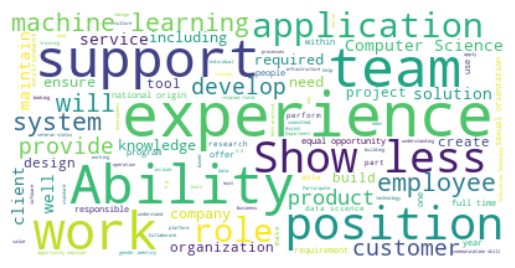

In [35]:
full_text = " ".join(review for review in data_df['Job Description'])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(full_text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<font size = 10 color = Blue>Word Cloud of all Title</font>

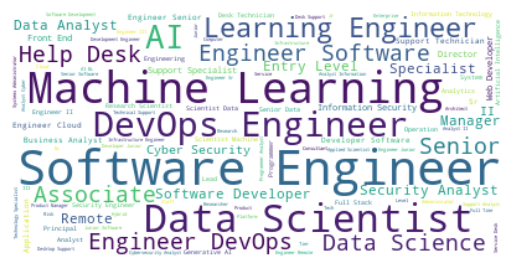

In [36]:
full_title = " ".join(review for review in data_df['Job Title'])

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(full_title)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<font size = 10 color = Blue>Word Cloud of a job</font>

(1, 24)


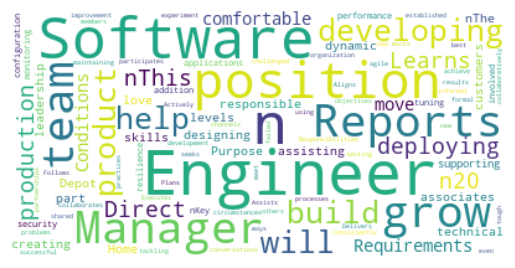

In [37]:
# get a sample of data
data_df_sample = data_df.sample()
print(data_df_sample.shape)
text = data_df_sample['Job Description'].values + data_df_sample['Job Title'].values

stopwords = set(STOPWORDS)
stopwords.update(["to","sex","may","Ability to","Full time","Experience with", "Job Type", "Experience"])

wordcloud = WordCloud(stopwords = stopwords,max_font_size=50, max_words=100, background_color='white').generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
